# Logistic Regression - Case Study I

In [15]:
#import required libraries
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt


In [16]:
#Loading and reading the dataset
df=pd.read_csv('affairs.csv')

In [17]:
#Validate the shape of the dataframe
df.shape

(6366, 9)

In [18]:
#Columns of Dataframe
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

In [19]:
#sneak peek into dataframe
df.sample(3)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
2728,4.0,22.0,0.5,0.0,4.0,12.0,3.0,2.0,0.000000
1408,4.0,37.0,16.5,3.0,3.0,12.0,3.0,5.0,0.212121
1789,1.0,37.0,16.5,2.0,3.0,14.0,3.0,5.0,0.727273


In [20]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
dtypes: float64(9)
memory usage: 447.7 KB


In [21]:
#summary of dataset
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [22]:
#convert affairs columns to 0 and 1
df['affairs'] = np.where(df['affairs']<=0, 0, 1)

In [23]:
#validate the updated affairs column
df['affairs'].value_counts()

0    4313
1    2053
Name: affairs, dtype: int64

# Data Exploration

In [24]:
#groupby affairs 
df.groupby('affairs').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
affairs,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559


### 1. Women having an affair rate thier marriages lower compared to rest in the group
### 2. Women with an affair have been married for longer period of time and seems less religious

In [12]:
#groupby ratings
df.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
rate_marriage,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.181446


### It seems an increase in age, yrs_married, and children appears to correlate with a declining marriage rating

In [25]:
df.groupby('yrs_married').mean()

,rate_marriage,age,children,religious,educ,occupation,occupation_husb,affairs
yrs_married,,,,,,,,
0.5,4.524324,22.156757,0.048649,2.454054,14.237838,3.302703,3.502703,0.043243
2.5,4.239921,23.640364,0.297198,2.312684,14.384956,3.383481,3.614061,0.215831
6.0,4.066608,26.439089,1.036810,2.347064,14.454864,3.469763,3.881683,0.339176
9.0,3.985050,28.985050,1.649502,2.368771,14.367110,3.393688,4.061462,0.421927
13.0,4.038983,32.610169,1.916102,2.457627,14.218644,3.474576,4.100000,0.411864
16.5,3.952323,35.135697,2.814181,2.601467,13.710269,3.415648,4.014670,0.451100
23.0,3.956843,41.013564,3.281751,2.652281,13.794081,3.511714,4.051788,0.425401


### Newly wed women are less likely to have an affair 

## Visualization

In [26]:
#show all the plots in the current notebook
%matplotlib inline

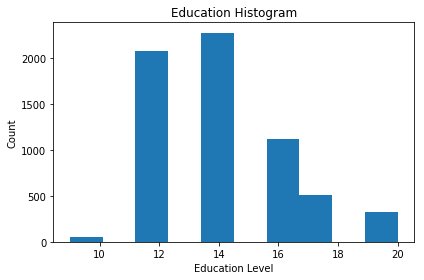

In [27]:
#Histograms
plt.hist(df.educ)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Histogram')
plt.tight_layout()
plt.show()

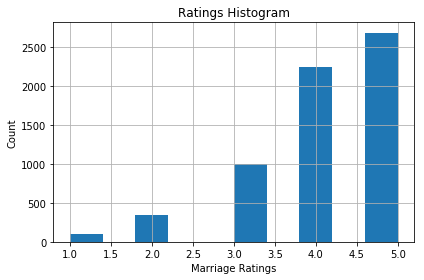

In [28]:
#Histogram of marriage rating
df.rate_marriage.hist()
plt.xlabel('Marriage Ratings')
plt.ylabel('Count')
plt.title('Ratings Histogram')
plt.tight_layout()
plt.show()


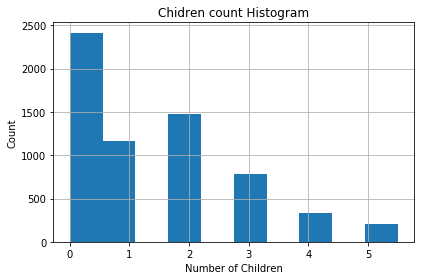

In [29]:
#Histogram of marriage rating
df.children.hist()
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Chidren count Histogram')
plt.tight_layout()
plt.show()

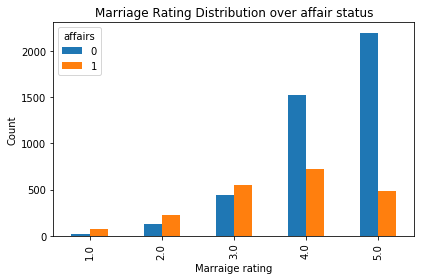

In [30]:
#Combined plots (marriage ratings and affair status)in absolute terms 
pd.crosstab(df.rate_marriage,df.affairs).plot(kind='bar')
plt.xlabel('Marraige rating')
plt.ylabel('Count')
plt.title('Marriage Rating Distribution over affair status')
plt.tight_layout()
plt.show()

### As evident by the above plot , women with low marriage ratings have more chances of affair

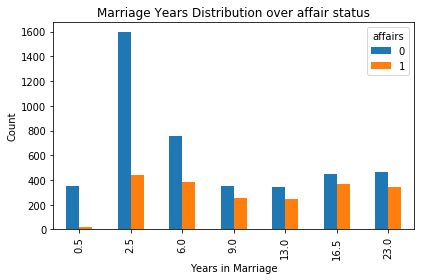

In [20]:
#Combined plots (years of marriage and affair status)in absolute terms 
pd.crosstab(df.yrs_married,df.affairs).plot(kind='bar')
plt.xlabel('Years in Marriage')
plt.ylabel('Count')
plt.title('Marriage Years Distribution over affair status')
plt.tight_layout()
plt.show()

# Data Preperation

In [22]:
#Datapreperation for Running the logistic regression model
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

## Dummy variables for categorical variables 

In [31]:
df_new=pd.get_dummies(data=df, columns=['educ', 'occupation', 'occupation_husb'])

In [32]:
print(len(df.columns))
print(len(df_new.columns))

9
24


In [33]:
#Shape of new dataframe
df_new.shape

(6366, 24)

In [34]:
df_new.head(2)

,rate_marriage,age,yrs_married,children,religious,affairs,educ_9.0,educ_12.0,educ_14.0,educ_16.0,...,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
0,3.0,32.0,9.0,3.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [35]:
#import model specific libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [36]:
#create input dataset without including target variable( affairs column)
X=df_new.loc[:, df_new.columns != 'affairs']

In [37]:
#Validate the shape of input data X
X.shape

(6366, 23)

In [38]:
#Create the new data with only target column
y=df_new['affairs']

In [39]:
y.shape

(6366,)

In [40]:
#Split the data into training and test data (70/30 ratio)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=100, stratify=y)


In [41]:
#validate the shape of train and test dataset
print (X_train.shape)
print (y_train.shape)

print (X_test.shape)
print (y_test.shape)

(4456, 23)
(4456,)
(1910, 23)
(1910,)


In [42]:
#check on number of positive classes in train and test data set
print(np.sum(y_train))
print(np.sum(y_test))

1437
616


## Build the classification model

In [43]:
#fit the logisitc regression model on training dataset 
logreg = LogisticRegression(class_weight='balanced').fit(X_train,y_train)

In [44]:
#validate the model performance on unseen data
logreg.score(X_test, y_test)

0.69057591623036652

In [45]:
#make predictions on unseen data
predictions=logreg.predict(X_test)

## Results 

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions,target_names=["Women without Affair", "Women with Affair"]))

                      precision    recall  f1-score   support

Women without Affair       0.82      0.70      0.75      1294
   Women with Affair       0.52      0.67      0.58       616

         avg / total       0.72      0.69      0.70      1910



In [47]:
from sklearn.metrics import roc_auc_score
#AUC score
logreg_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print("AUC for Logistic Regression: {:.3f}".format(logreg_auc))

AUC for Logistic Regression: 0.749


## Hyperparameter tunning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
#fit the model
log_model=LogisticRegression()

In [50]:
#create parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 15,20,100]}

In [51]:
#Run grid search algorithm
grid_search = GridSearchCV(log_model, param_grid, cv=5)

In [52]:
#Fit the model on training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 15, 20, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
#validate the new score of model
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.72


### Best Parameters 

In [54]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.73


In [55]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


## ROC Curve

In [62]:
from sklearn.metrics import roc_curve, auc

In [75]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)


roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc

0.68445397338364877

In [76]:
false_positive_rate

array([ 0.        ,  0.29829985,  1.        ])

In [77]:
true_positive_rate

array([ 0.        ,  0.66720779,  1.        ])

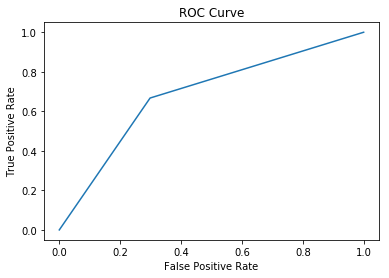

In [82]:
plt.plot(false_positive_rate,true_positive_rate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show() 

## Change the probability threshold

In [73]:
#Alter the threshold
y_pred_lower_threshold = logreg.predict_proba(X_test)[:,1] >.3

In [74]:
print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       0.90      0.34      0.49      1294
          1       0.40      0.92      0.55       616

avg / total       0.74      0.52      0.51      1910

